In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import pandas as pd
import random
import matplotlib
import sys

from copy import deepcopy

from scipy.interpolate import interp1d
from astropy.cosmology import FlatLambdaCDM

import semlinlens_v3 as lens
import func_get_h_eta as h_eta
import func_get_rel_CK as rel
import func_combineh0 as h0

#redirect to wherever pygravlens is stored
sys.path.insert(0,'/home/dilys/pygravlens/')
import pygravlens as gl

In [2]:
plt.rcParams.update({'font.size': 16, 'text.usetex': False})
dpi_set=400
plt.rc('axes', labelsize=16)

from astropy.cosmology import FlatLambdaCDM
cosmo100 = FlatLambdaCDM(H0=100,Om0=0.315)

# source and lens redshift:
zsrc = 2.0
zlens = 0.3

#true h where H0=100h km/s/Mpc, and true mass power law slope (1 is isothermal)
h_true = 0.7
eta_true = 1.0

%matplotlib inline
folder = './'

### ENTER NUMBER OF SAMPLES:
n_samples = 5

In [3]:
### FILE NAMES
root = 'EPLXS_'

files = []
datfiles = []

for n in range(1,n_samples+1):
    datfiles.append(folder+root+str(n)+'.dat')
    files.append(folder+root+str(n)+'.txt')

In [12]:
nopt = 100
nwalk = 100
nburn = 3000
nmain = 3000
ellip = True

for n in range(1,n_samples+1):
    basename=folder+root+str(n)
    # load the lens data
    quad = lens.lens(basename+'.dat',zlens,zsrc,cosmo100, Amode='b')
        
    pbest = quad.opt_MCin(nopt, basename,basename,zlens, zsrc, ellip=True,eta_range=[0.5,1.5], 
              mode='fullsum1', fluxmode='none')
    
    samples = quad.runMC(pstart=pbest,mode='fullsum1',ellip=ellip,nwalk=nwalk,nburn=nburn,nmain=nmain,outname=basename)
    
    # check optimizing from one of the samples
    print('final optimization:')
    opt = quad.optimize(samples[0],mode='fullsum1',ellip=ellip)
    print(opt[1],opt[0])
    
    plt.close()

Read image data from file ./EPLXS_1.dat
<r> = 1.174
Optimizing
best so far: 13067.472978251024 [-0.21462449  0.0094501   0.11930992 -0.02813869  0.02690439 -0.03771053
  1.38925725  0.51081449  0.831252  ]
best so far: 2186.79277531119 [-0.27349186 -0.01136512  0.23299277 -0.13658235 -0.05137304 -0.32778487
  0.89778235  0.50085005  1.09722471]
best so far: 6.114369680734373e-08 [-1.68060039e-01 -3.05149987e-04  2.20000344e-01 -1.08095526e-06
  1.49999380e-01  1.49998165e-01  1.00000079e+00  9.99995837e-01
  6.99067186e-01]
best so far: 6.064632344500461e-08 [-1.68059985e-01 -3.05152535e-04  2.20000238e-01 -1.02521259e-06
  1.49999216e-01  1.49998230e-01  1.00000087e+00  9.99996332e-01
  6.99067289e-01]
best so far: 5.9449432936647654e-08 [-1.68059997e-01 -3.05152725e-04  2.20000339e-01 -1.06505592e-06
  1.49999439e-01  1.49998134e-01  1.00000076e+00  9.99996233e-01
  6.99066762e-01]
best so far: 5.384009792187908e-08 [-1.68060181e-01 -3.05162040e-04  2.20000866e-01 -1.22400728e-06
  1

In [13]:
### READ INFO FROM MCMC FITS:
info = rel.get_info(datfiles)
h_med, h_err, eta_med, eta_err = h_eta.get_info(files, eta_tracker=1.0, increment=0.)
eta_bias = np.abs(eta_true-np.array(eta_med))
h_bias = np.abs(h_true-np.array(h_med))

imgpos, drarr, taumat
h_med, h_err, eta_med, eta_err


Text(0.5, 0, '$\\Delta r_{1,2}$ [arcsec]')

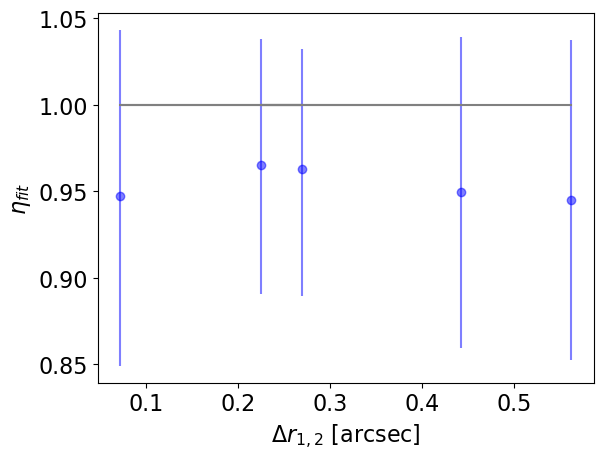

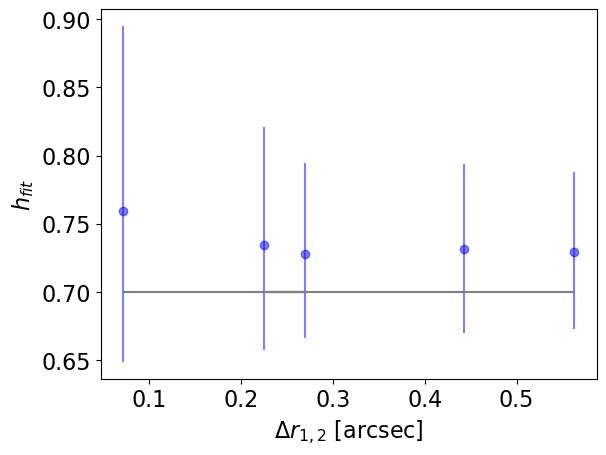

In [15]:
### PLOT MCMC BEST-FIT VALUES FOR H AND ETA AS A FUNCTION OF ANNULUS LENGTH

drarr = info[1]
taumat = info[2]
ann14 = drarr[:,3]
ann13 = drarr[:,2]
ann12 = drarr[:,1]
tau14 = taumat[:,0,3]
tau13 = taumat[:,0,2]
tau12 = taumat[:,0,1]
    

#############################################################
X = ann12
xlabel = '$\Delta r_{1,2}$ [arcsec]'
xfile = 'ann12'
colorr='blue'
#############################################################

bias = eta_bias
plt.figure()
plt.errorbar(X, eta_med, yerr=[ eta_err[0], eta_err[1] ], marker='o', color=colorr, linestyle='', alpha=0.5)
plt.plot(X, [eta_true]*len(X), linestyle='-', color='grey')
plt.ylabel('$\\eta_{fit}$')
plt.xlabel(xlabel)

bias = h_bias
plt.figure()
plt.errorbar(X, h_med, yerr=[ h_err[0], h_err[1] ], marker='o', linestyle='', color=colorr, alpha=0.5)
plt.plot(X, [h_true]*len(X), linestyle='-', color='grey')
plt.ylabel('$h_{fit}$')
plt.xlabel(xlabel)

imgpos, drarr, taumat
median is: 0.2694584959600075
std dev is:0.19170921986784814
mean is:0.31433425288870864
[True, True, True, True, True]
5
[True, True, True, True, True]
5
all
EPLXS_ all ./
0.7278750192192245 0.697166067612561 0.7589677780532282
0.030708951606663537 0.031092758834003753


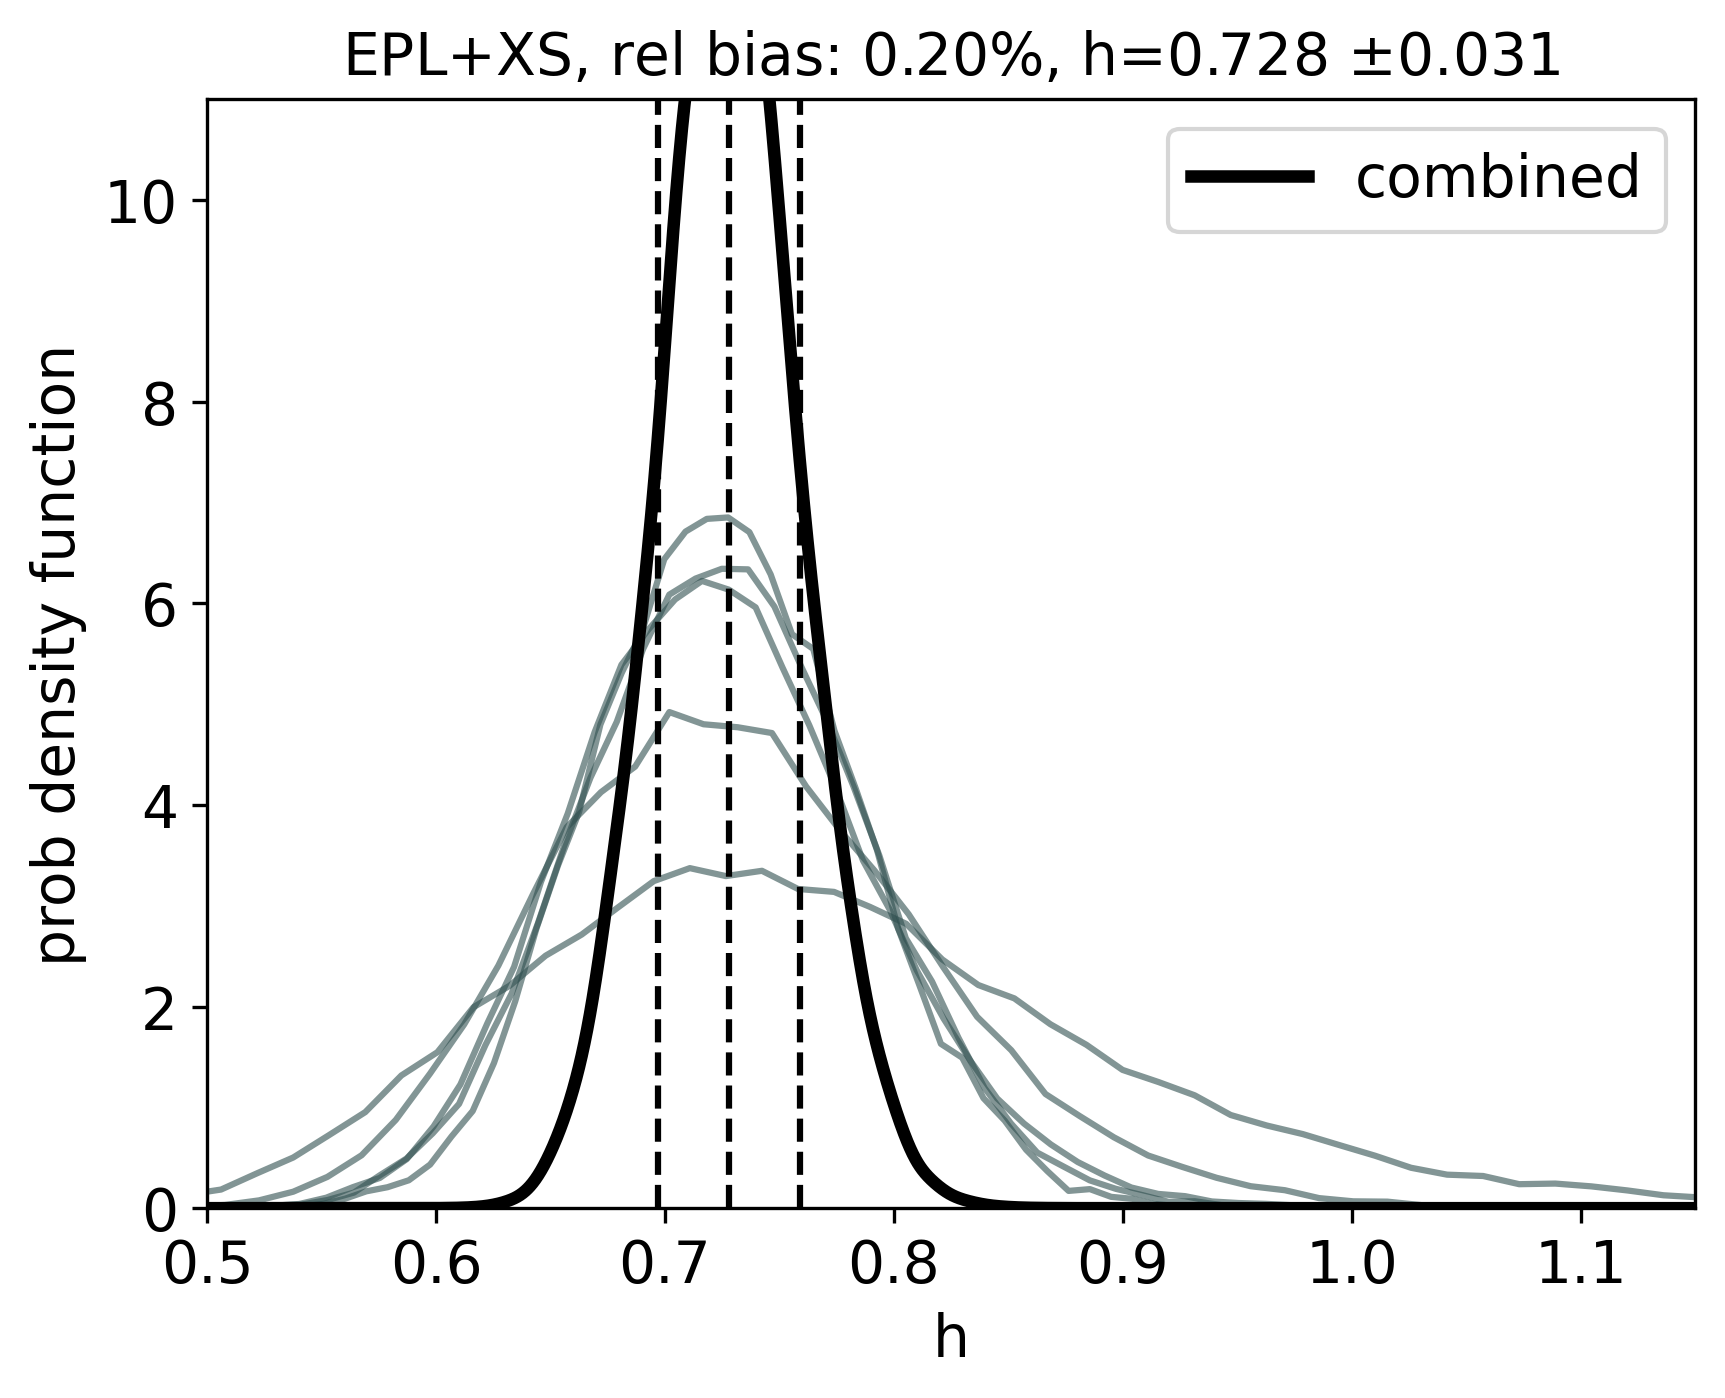

In [4]:
### combine likelihoods for overall h value

h0.combineh0('./', 'EPLXS_', 5, 'darkslategrey', 'ellip', 'all', '', 'EPL+XS', 'EPLXS')